# Analyzing Health Care Incidents:
### Weapon Use
### Perpetrator Behavior 
### Geographic Patterns

1. This Notebook provides an in-depth analysis of a dataset containing incidents related to attacks on health care facilities and personnel.
2. The primary objective is to offer insights into patterns of weapon usage, perpetrator behavior, and the geographical distribution of these incidents, with a focus on aiding decision-making for upper management.

### Objectives 

#### 1. Support Strategic Decision-Making:
The visualizations and analyses aim to help upper management identify key patterns in perpetrator behavior, weapon usage, and the geographic impact of attacks.
#### 2. Understand Risks and Threats:
By recognizing hotspots and common weapons, management can develop targeted responses to mitigate future incidents.
#### 3. Assess Human Impact: 
The analysis of health worker casualties offers a clear picture of the human toll, prompting potential adjustments in policy or security measures.

### Step-1: Importing Necessary Dependencies

In [249]:
# Step 1: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

### Step -2: Loading The Data 

In [250]:
# Step 2: Load the dataset
file_path = 'C:/Users/faraz/Downloads/Niksun/ml_datasets/War_21st Century_Israel-Hamas_War/2023-2024-israel-and-opt-attacks-on-health-care-incident-data.xlsx'
data = pd.read_excel(file_path)


data.head()

,Date,Event Description,Country,Country ISO,Admin 1,Reported Perpetrator,Reported Perpetrator Name,Weapon Carried/Used,Location of Incident,Number of Attacks on Health Facilities Reporting Destruction,...,Known Kidnapping or Arrest Outcome,Health Workers Threatened,Health Workers Assaulted,Health Workers Sexually Assaulted,Conflict-Related Violence,Political-Related Violence,COVID-19-Related Violence,Ebola-Related Violence,Vaccination-Related Violence,SiND Event ID
0,2024-05-20,20 May 2024: The vicinity of a hospital was hi...,OPT,PSE,Gaza Strip,Host Government: Military,Israeli Defence Forces,Aerial Bomb: Plane,Health Building,0,...,NaN,0,0,0,ConflictEvent,NotApplicable,NotApplicable,NotApplicable,NotApplicable,47057
1,2024-05-20,"20 May 2024: In Jabalia Refugee Camp, medical ...",OPT,PSE,Gaza Strip,Host Government: Military,Israeli Defence Forces,Artillery,Health Building,0,...,NaN,0,0,0,ConflictEvent,NotApplicable,NotApplicable,NotApplicable,NotApplicable,47059
2,2024-05-19,19 May 2024: A hospital was damaged by Israeli...,OPT,PSE,Gaza Strip,Host Government: Military,Israeli Defence Forces,Aerial Bomb: Plane,Health Building,0,...,NaN,0,0,0,ConflictEvent,NotApplicable,NotApplicable,NotApplicable,NotApplicable,47032
3,2024-05-19,19 May 2024: An NGO hospital was hit with shel...,OPT,PSE,Gaza Strip,Host Government: Military,Israeli Defence Forces,Artillery,Health Building,0,...,NaN,0,0,0,ConflictEvent,NotApplicable,NotApplicable,NotApplicable,NotApplicable,47033
4,2024-05-18,"18 May 2024: In Jabalia Refugee Camp, an Israe...",OPT,PSE,Gaza Strip,Host Government: Military,Israeli Defence Forces,Aerial Bomb: Plane,Health Building,0,...,NaN,0,0,0,ConflictEvent,NotApplicable,NotApplicable,NotApplicable,NotApplicable,47031


### Step 3: Preprocess the data
We will check for missing values, handle them, and make sure the 'Date' column is in datetime format.

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 33 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   Date                                                          1219 non-null   datetime64[ns]
 1   Event Description                                             1219 non-null   object        
 2   Country                                                       1219 non-null   object        
 3   Country ISO                                                   1219 non-null   object        
 4   Admin 1                                                       1219 non-null   object        
 5   Reported Perpetrator                                          1219 non-null   object        
 6   Reported Perpetrator Name                                     1219 non-null   object        
 7   Weapon

In [252]:
## Checking for all the missing Values in the Dataset 
data.isnull().sum()

Date                                                               0
Event Description                                                  0
Country                                                            0
Country ISO                                                        0
Admin 1                                                            0
Reported Perpetrator                                               0
Reported Perpetrator Name                                          0
Weapon Carried/Used                                                0
Location of Incident                                               0
Number of Attacks on Health Facilities Reporting Destruction       0
Number of Attacks on Health Facilities Reporting Damaged           0
Forceful Entry into Health Facility                                0
Occupation of Health Facility                                      0
Vicinity of Health Facility Affected                               0
Health Transportation Destroyed   

In [253]:
data_cleaned = data.dropna(axis=1)
data_cleaned.info()
df = data_cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 32 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   Date                                                          1219 non-null   datetime64[ns]
 1   Event Description                                             1219 non-null   object        
 2   Country                                                       1219 non-null   object        
 3   Country ISO                                                   1219 non-null   object        
 4   Admin 1                                                       1219 non-null   object        
 5   Reported Perpetrator                                          1219 non-null   object        
 6   Reported Perpetrator Name                                     1219 non-null   object        
 7   Weapon

## Step-4: Visualizations

##### 1. Weapon Use by Perpetrator:
    A horizontal stacked bar chart representing the distribution of weapons used by the top perpetrators in percentage terms.
    This visualization helps management understand which weapons are most commonly associated with specific groups, aiding in 
    threat assessment.
#### 2. Geographical Distribution of Incidents:
    Visualizes the number of incidents in the top countries, identifying geographical hotspots.
    Provides a regional view of the most frequent perpetrators and weapon usage in different countries.
#### 3. Impact on Health Workers:
    A pie chart showcasing the proportion of health workers killed, injured, or kidnapped, highlighting the human cost of these
    attacks
#### 4. Perpetrator Behavior and Trends:
    Explores trends in perpetrator activity over time, showing shifts in the frequency of incidents linked to different groups.

Based on the dataset structure, key features that could be relevant for decision-making in a management context include:

    Date: Temporal analysis of incidents.
    Country: To understand geographic distribution.
    Reported Perpetrator & Perpetrator Name: Helps in identifying the actors behind incidents.
    Weapon Used: Type of weapon can indicate severity and potential responses.
    Health Facilities Affected: Damage or destruction of health facilities.
    Health Workers Impacted: Including workers killed, injured, kidnapped, etc.

#  Time Series of Incidents

C:\Users\faraz\AppData\Local\Temp/ipykernel_9004/1091490575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


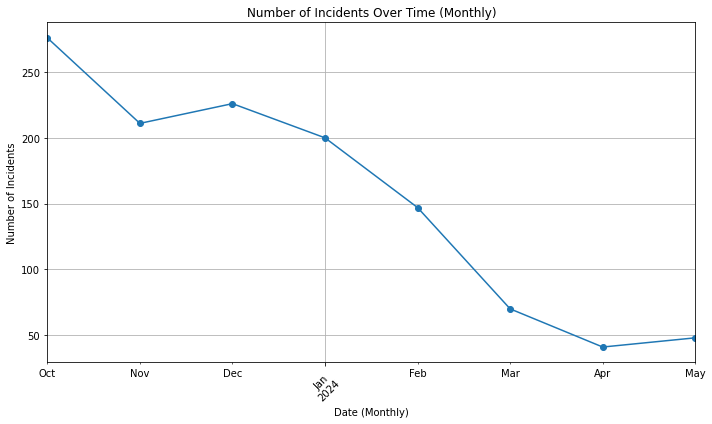

In [254]:
# Ensure 'Date' is properly formatted as datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Group incidents by month
df_time_series = df.groupby(df['Date'].dt.to_period('M')).size()

# Plot: Time Series - Number of Incidents Over Time
plt.figure(figsize=(10, 6))
df_time_series.plot(kind='line', marker='o', linestyle='-', title='Number of Incidents Over Time (Monthly)')
plt.ylabel('Number of Incidents')
plt.xlabel('Date (Monthly)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar Chart of Incidents by Country 

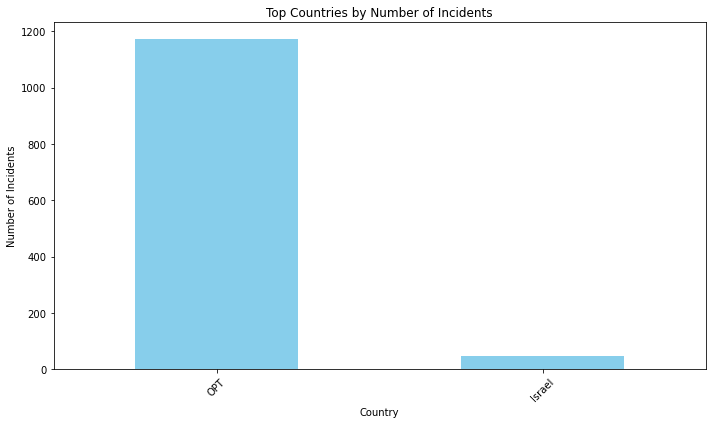

In [255]:
# Get top 10 countries by number of incidents
df_country = df['Country'].value_counts().head(10)

# Plot: Incidents by Country
plt.figure(figsize=(10, 6))
df_country.plot(kind='bar', color='skyblue', title='Top Countries by Number of Incidents')
plt.ylabel('Number of Incidents')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

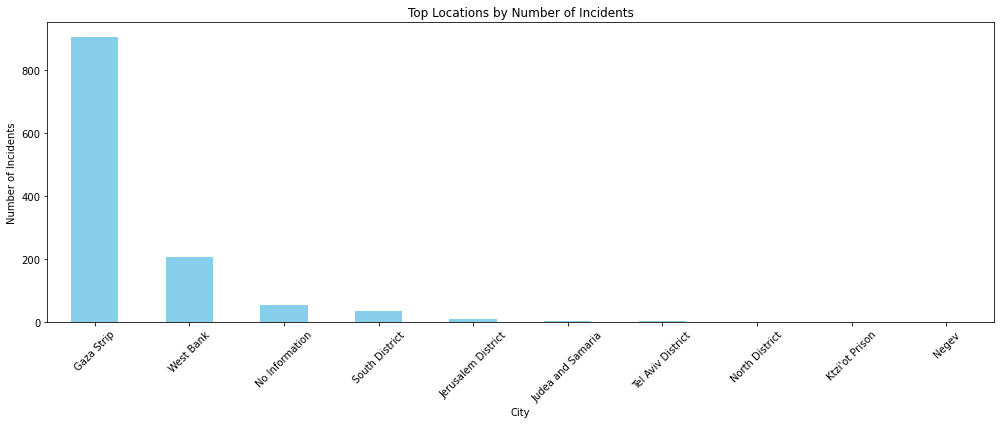

In [256]:
# Get top 10 countries by number of incidents
df_country = df['Admin 1'].value_counts().head(10)

# Plot: Incidents by Country
plt.figure(figsize=(14, 6))
df_country.plot(kind='bar', color='skyblue', title='Top Locations by Number of Incidents')
plt.ylabel('Number of Incidents')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Health Workers Killed', 'Health Workers Injured', 'Health Workers Kidnapped'

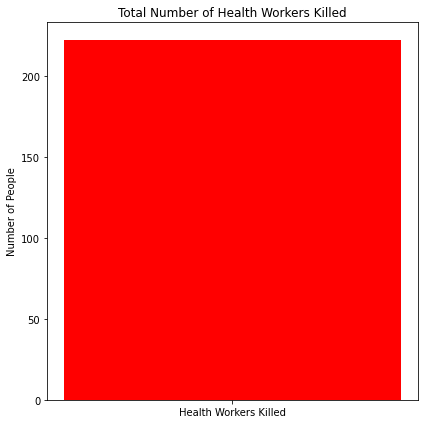

In [257]:
# Summing the total number of health workers killed
total_killed = pd.to_numeric(df['Health Workers Killed'], errors='coerce').sum()

# Plotting a simple bar chart to visualize the total number of people killed
plt.figure(figsize=(6, 6))
plt.bar('Health Workers Killed', total_killed, color='red')

# Adding title and labels
plt.title('Total Number of Health Workers Killed')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

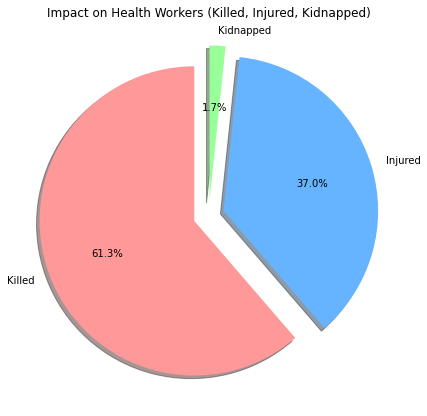

In [258]:
df_workers_impacted = df[['Health Workers Killed', 'Health Workers Injured', 'Health Workers Kidnapped']].apply(pd.to_numeric, errors='coerce')

# Sum of each impact category
impact_totals = df_workers_impacted.sum()

# Define labels and colors for the pie chart
labels = ['Killed', 'Injured', 'Kidnapped']
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0.1, 0.1)  # 'explode' the slices to make them stand out

# Plot: Enhanced Pie Chart for Health Workers Impacted
plt.figure(figsize=(6, 6))
plt.pie(impact_totals, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors, shadow=True)
plt.title('Impact on Health Workers (Killed, Injured, Kidnapped)')
plt.tight_layout()
plt.show()


# Health Facility Impact by Perpetrator 

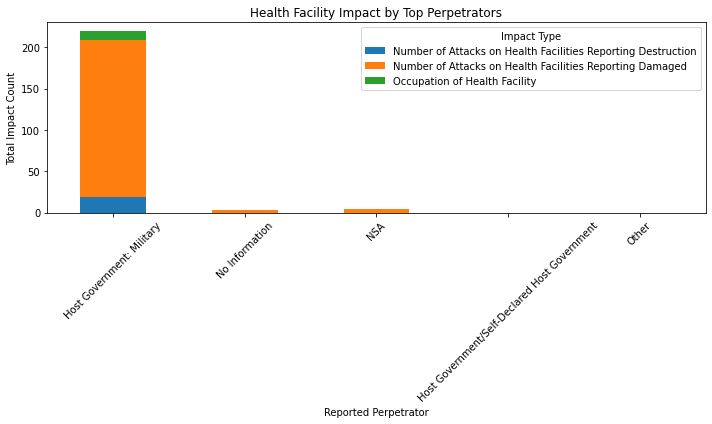

In [259]:
# Let's consider three key columns for health facility impact
df_health_impact = df[['Reported Perpetrator', 'Number of Attacks on Health Facilities Reporting Destruction', 'Number of Attacks on Health Facilities Reporting Damaged', 'Occupation of Health Facility']].replace('Yes', 1).replace('No', 0)
df_health_impact = df_health_impact.groupby('Reported Perpetrator').sum()

# Plot: Health Facility Impact by Perpetrator
df_health_impact.loc[top_perpetrators].plot(kind='bar', stacked=True, figsize=(10,6), title='Health Facility Impact by Top Perpetrators')
plt.ylabel('Total Impact Count')
plt.xlabel('Reported Perpetrator')
plt.xticks(rotation=45)
plt.legend(title='Impact Type')
plt.tight_layout()
plt.show()

#  Weapon Usage by Perpetrators 

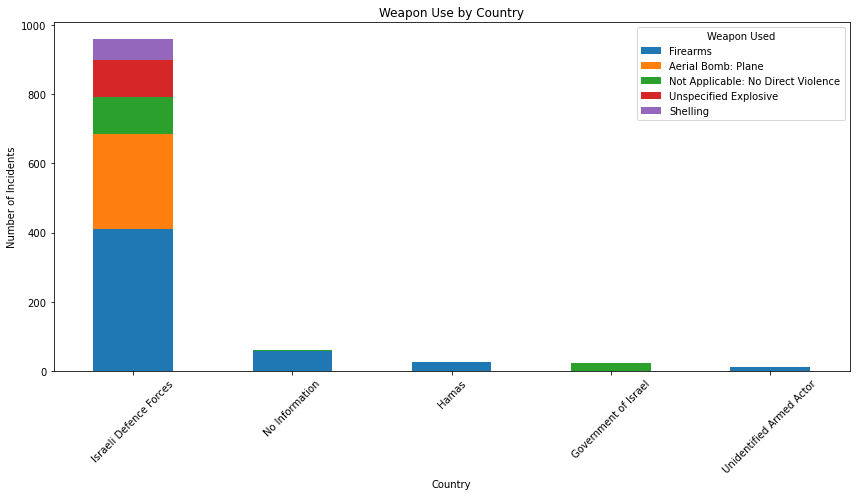

In [260]:
# ---------- Weapon Usage by Country ----------
# Cross-tab of Country and Weapon Used
df_weapon_country = pd.crosstab(df['Reported Perpetrator Name'], df['Weapon Carried/Used'])

# Plot: Weapon Use in Top Countries
top_countries = df['Reported Perpetrator Name'].value_counts().head(5).index

df_weapon_country.loc[top_countries, top_weapons].plot(kind='bar', stacked=True, figsize=(12,7), title='Weapon Use by Country')
plt.ylabel('Number of Incidents')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Weapon Used')
plt.tight_layout()
plt.show()

# Trends in Weapon Usage Over Time 

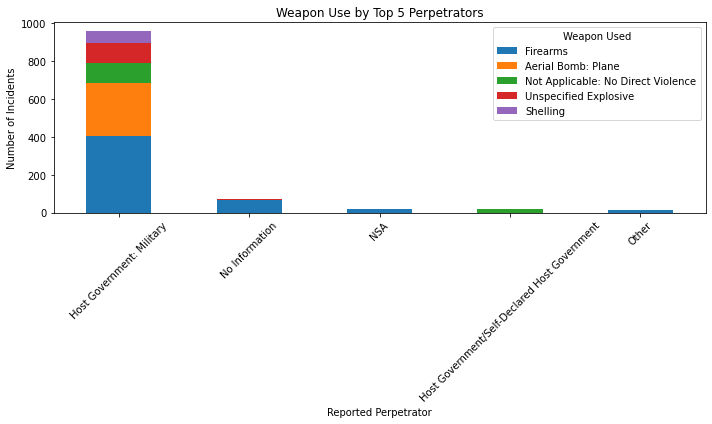

In [261]:
# Cross-tab of Perpetrator and Weapon Used
df_weapon_perp = pd.crosstab(df['Reported Perpetrator'], df['Weapon Carried/Used'])

# Plot: Weapon Use by Top 5 Perpetrators
top_perpetrators = df['Reported Perpetrator'].value_counts().head(5).index
df_weapon_perp.loc[top_perpetrators, top_weapons].plot(kind='bar', stacked=True, figsize=(10,6), title='Weapon Use by Top 5 Perpetrators')
plt.ylabel('Number of Incidents')
plt.xlabel('Reported Perpetrator')
plt.xticks(rotation=45)
plt.legend(title='Weapon Used')
plt.tight_layout()
plt.show()

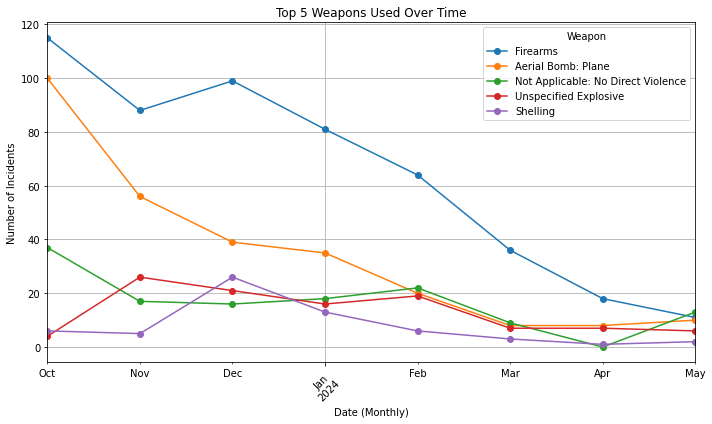

In [262]:
# Group by weapon and time (monthly) to see trends
df_weapon_time = df.groupby([df['Date'].dt.to_period('M'), 'Weapon Carried/Used']).size().unstack(fill_value=0)

# Plot: Top 5 Weapons Used Over Time
top_weapons = df['Weapon Carried/Used'].value_counts().head(5).index
df_weapon_time[top_weapons].plot(kind='line', marker='o', figsize=(10,6), title='Top 5 Weapons Used Over Time')
plt.ylabel('Number of Incidents')
plt.xlabel('Date (Monthly)')
plt.xticks(rotation=45)
plt.legend(title='Weapon')
plt.grid(True)
plt.tight_layout()
plt.show()

# Frequency of Weapon Use

In [263]:
# Create a table of weapon types and their counts
weapon_table = pd.DataFrame({'Weapon Type': weapon_counts.index, 'Weapon Count': weapon_counts.values})

# Display the table in the notebook
weapon_table

,Weapon Type,Weapon Count
0,Firearms,512
1,Aerial Bomb: Plane,276
2,Not Applicable: No Direct Violence,132
3,Unspecified Explosive,106
4,Shelling,62
5,Artillery,43
6,Aerial Bomb: Drone,21
7,No Information on the Weapon Used,17
8,Other Weapon,11
9,Rocket,9


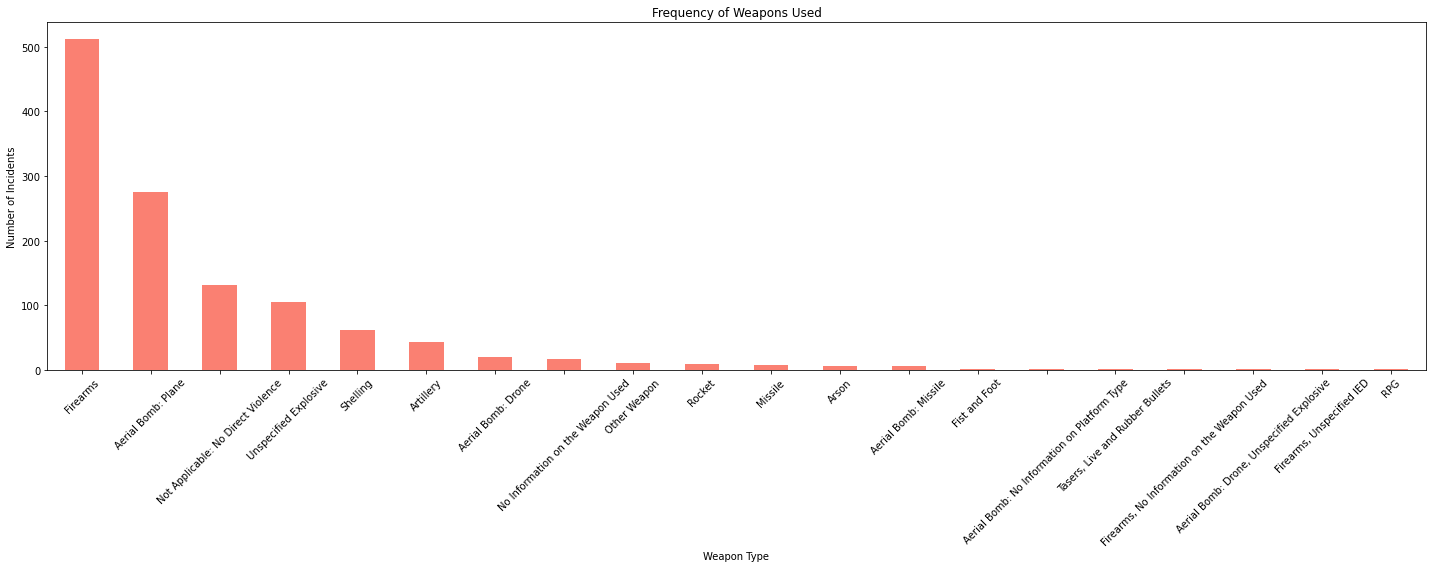

In [264]:
# ---------- Frequency of Weapons Used ----------
# Count the occurrences of each weapon
weapon_counts = df['Weapon Carried/Used'].value_counts()

# Plot: Frequency of Weapons Used
plt.figure(figsize=(20, 8))
weapon_counts.plot(kind='bar', color='salmon', title='Frequency of Weapons Used')
plt.ylabel('Number of Incidents')
plt.xlabel('Weapon Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1080x720 with 0 Axes>

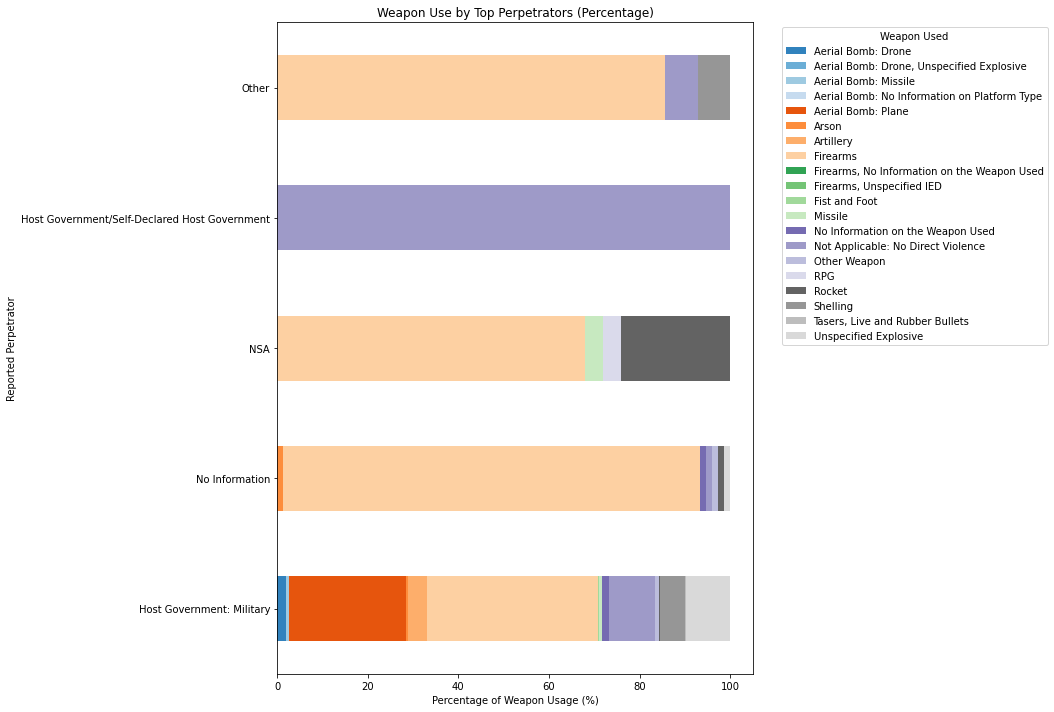

In [265]:
# Cross-tab of Perpetrator and Weapon Used
df_weapon_perp = pd.crosstab(df['Reported Perpetrator'], df['Weapon Carried/Used'])

# Calculate the percentage of weapon use per perpetrator
df_weapon_perp_percentage = df_weapon_perp.div(df_weapon_perp.sum(axis=1), axis=0) * 100

# Plot: Weapon Use by Top Perpetrators as a Horizontal Stacked Bar Chart with Percentage
plt.figure(figsize=(15, 10))
df_weapon_perp_percentage.loc[top_perpetrators].plot(kind='barh', stacked=True, figsize=(15,10), title='Weapon Use by Top Perpetrators (Percentage)', colormap='tab20c')

# Move the legend outside of the plot for clarity
plt.legend(title='Weapon Used', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Percentage of Weapon Usage (%)')
plt.ylabel('Reported Perpetrator')
plt.tight_layout()
plt.show()